In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Link**: [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include
- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.

In [34]:
df = pd.read_csv("data/vgsales.csv")

---
## **1. EXPLORE THE DATA TO GAIN INSIGHTS**
---

In [35]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [37]:
type(df["Year"][0])

numpy.float64

In [38]:
df["Rank"] = df["Rank"].astype("object")
df["Year"] = df["Year"].replace(np.nan, 0)
df["Year"] = df["Year"].map(lambda x: int(x))
df["Year"] = df["Year"].astype("object")

In [39]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               40
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [40]:
df.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [41]:
df.describe(include = "object")

,Rank,Name,Platform,Year,Genre,Publisher
count,16598,16598,16598,16598,16598,16540
unique,16598,11493,31,40,12,578
top,16600,Need for Speed: Most Wanted,DS,2009,Action,Electronic Arts
freq,1,12,2163,1431,3316,1351


- Total number sales have a positive trend before year 2010. After 2010, total number sales tend to decrease, it happened because around 2010, many people use smartphone and many game had developed and most of the game in smartphone is free. If we calculate the number growth, since 2010 the number growth tend to be stagnant. Because of this, many people tend to play game through smartphone. It become the challenge in game industry especially video game in platform like playstation ir xbox.
- Action and sports become the highest total sales in video games. Playstation 2 become platform with the highest total sales in video game. For added information, Playstation 2 was made in 2000.
- Nintendo and EA become publisher with the highest total sales. This 2 publisher have many games in sports genre.
- Based in regional, all regional have the same condition in term of total number sales. After 2010 total number sales was decrease.
- If we look based each regional based on the genre, people in North America, Europe and Other tend to more like Action and Sport game than people in Japan. In Japan people more like Role Playing game than Action or Sports.
- Different with other regional, Nintendo seems to be more success in Japan, their sales more higher if we compare with other publisher like EA or Sony who have HQ also at Japan.
- To check publisher performance, I took 4 publisher who have the highest total sales, Nintendo, EA, Activision, and Sony. Nintendo sales is not that good for Other regional. Above I said that Nintendo more success in Japan but in this data, the distribution from Japan and North America or Europe tend to have the same distribution. This data is only compare the total number not number of sales / number population from that regional. North America and Europe have higher population than Japan. Nintendo have their own platform like Wii and DS, and most of their game have to be played in this platform, that's why the highest number for platform in Nintendo are Wii or DS followed by GB, NES, and 3DS which they Nintendo's products too.
- EA seems to have the highest total sales in North America and Europe, one of their games, FIFA, is one of the most sucessufull game by EA. Also EA have many games with sport genre. Many game by EA can be played using Playstation or Xbox.
- Activision is like EA, they very success in North America and Europe. Different with EA, Activision have many games with action genre. Same like EA, many game by Activision can be played using Playstation or Xbox.
- Sony have many games from many genres, they have adventure, action, or sports. This is why they almost have the same curve for every regional. Sony is like Nintendo, they create their own platform. Game by Sony only can be played in their platform, which is Playstation.
- Basicly, people who want to play game by Nintendo must have platform from Nintendo and people who want play game by Sony must have platform from Sony.

In [42]:
def ma_calculate(data, window = 1, min_periods = 1, thresholds = 2):
    mean = pd.DataFrame(data.rolling(window = window, min_periods = min_periods).mean())
    std = pd.DataFrame(data.rolling(window = window, min_periods = min_periods).std())
    upper_band= mean + thresholds * std
    lower_band= mean - thresholds * std
    anomaly_index = np.where((data > upper_band) | (data < lower_band))[0]
    return mean, std, upper_band, lower_band, anomaly_index

**GLOBAL**

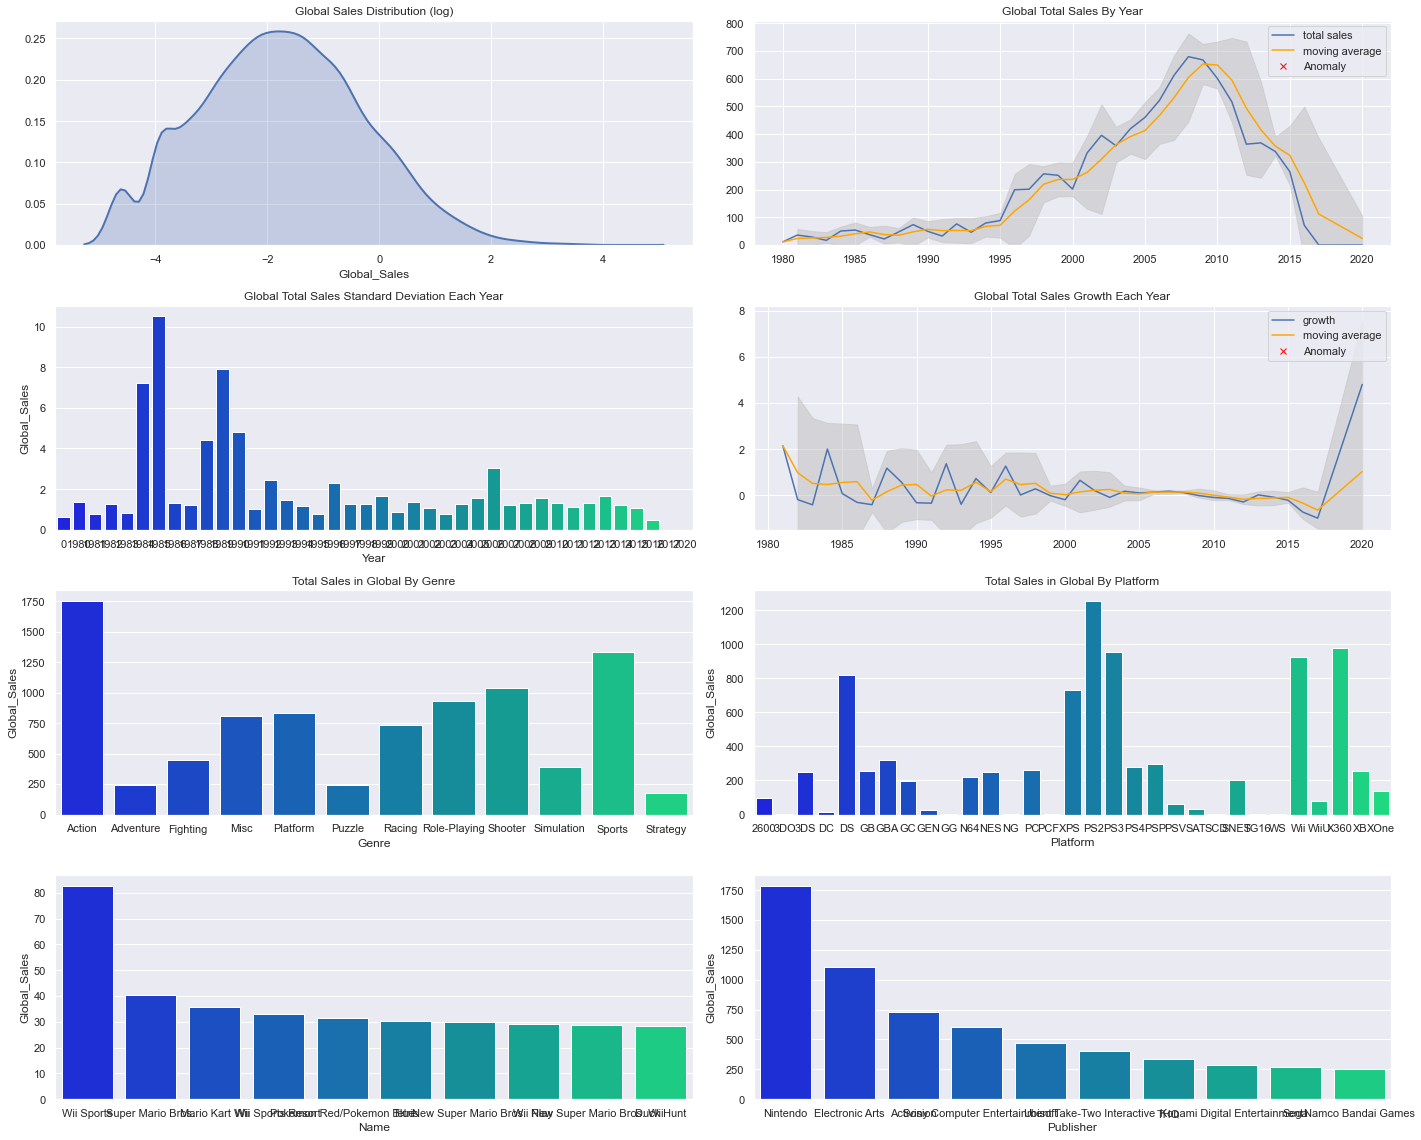

In [43]:
fig, ax = plt.subplots(4, 2, figsize = (20, 16))
data_graph = pd.DataFrame(df[df["Year"] != 0].groupby("Year").sum()["Global_Sales"])
mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 3)

sns.distplot(np.log(df[df["Global_Sales"] != 0]["Global_Sales"]), hist = False, kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[0, 0])

ax[0, 1].plot(data_graph.index, data_graph, label = "total sales")
ax[0, 1].plot(mean.index, mean, color = "orange", label = "moving average")
ax[0, 1].fill_between(x = mean.index, y1 = lower_band["Global_Sales"], y2 = upper_band["Global_Sales"], color = "silver", alpha = 0.5)
ax[0, 1].plot(data_graph.index[anomaly_index], data_graph.iloc[anomaly_index], "x", color="red", label="Anomaly")

sns.barplot(x = "Year", y = "Global_Sales", data = df.groupby("Year").std().reset_index(), palette = "winter", ax = ax[1, 0])

data_graph = pd.DataFrame(df[df["Year"] != 0].groupby("Year").sum()["Global_Sales"].pct_change().dropna())
mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 3)
ax[1, 1].plot(data_graph.index, data_graph, label = "growth")
ax[1, 1].plot(mean.index, mean, color = "orange", label = "moving average")
ax[1, 1].fill_between(x = mean.index, y1 = lower_band["Global_Sales"], y2 = upper_band["Global_Sales"], color = "silver", alpha = 0.5)
ax[1, 1].plot(data_graph.index[anomaly_index], data_graph.iloc[anomaly_index], "x", color="red", label="Anomaly")

sns.barplot(x = "Genre", y = "Global_Sales", data = df.groupby("Genre").sum().reset_index(), palette = "winter", ax = ax[2, 0])
sns.barplot(x = "Platform", y = "Global_Sales", data = df.groupby("Platform").sum().reset_index(), palette = "winter", ax = ax[2, 1])

data_graph = df.sort_values("Global_Sales", ascending = False).head(10)
sns.barplot(x = "Name", y = "Global_Sales", data = data_graph, palette = "winter", ax = ax[3, 0])
sns.barplot(x = "Publisher", y = "Global_Sales", data = df.groupby("Publisher").sum().reset_index().sort_values("Global_Sales", ascending = False).head(10), palette = "winter", ax = ax[3, 1])

ax[0, 0].set_title("Global Sales Distribution (log)")
ax[0, 1].set_title("Global Total Sales By Year")
ax[1, 0].set_title("Global Total Sales Standard Deviation Each Year")
ax[1, 1].set_title("Global Total Sales Growth Each Year")
ax[2, 0].set_title("Total Sales in Global By Genre")
ax[2, 1].set_title("Total Sales in Global By Platform")
ax[0, 1].legend()
ax[1, 1].legend()
ax[0, 1].set_ylim(0)
ax[1, 1].set_ylim(-1.5)
plt.tight_layout()
plt.show()

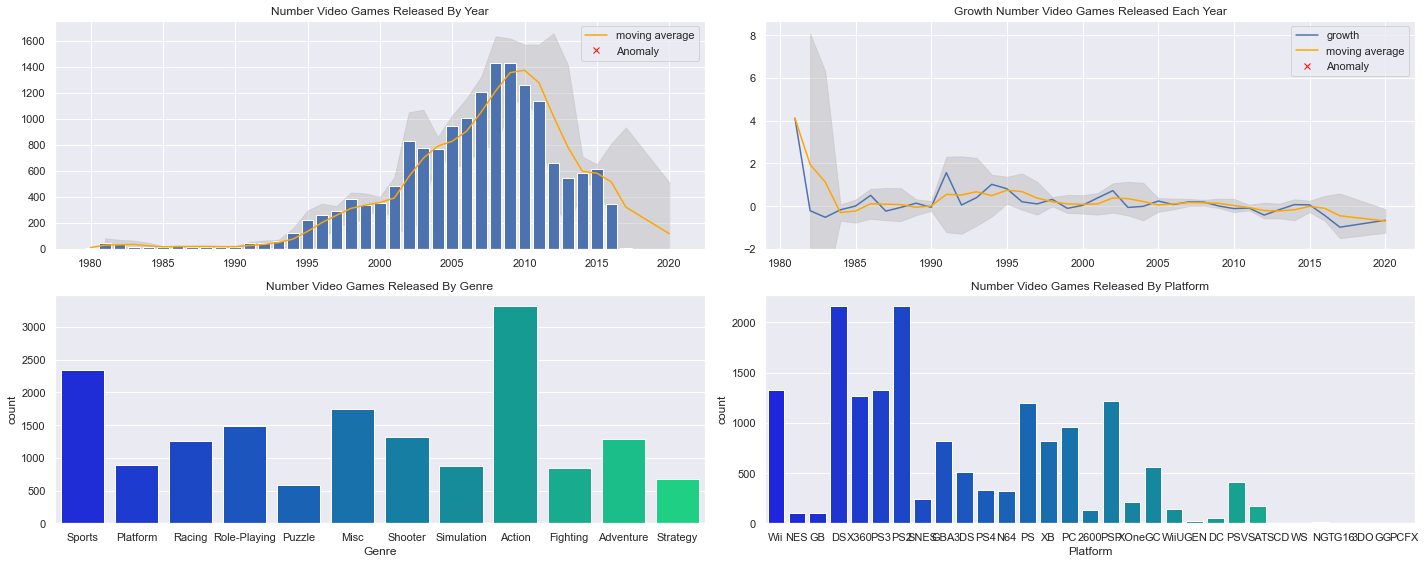

In [44]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
data_graph = pd.DataFrame(df[df["Year"] != 0].groupby("Year").nunique()["Rank"])
mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 3)

ax[0, 0].bar(data_graph.index, data_graph["Rank"])
ax[0, 0].plot(mean.index, mean, color = "orange", label = "moving average")
ax[0, 0].fill_between(x = mean.index, y1 = lower_band["Rank"], y2 = upper_band["Rank"], color = "silver", alpha = 0.5)
ax[0, 0].plot(data_graph.index[anomaly_index], data_graph.iloc[anomaly_index], "x", color="red", label="Anomaly")

data_graph = pd.DataFrame(df[df["Year"] != 0].groupby("Year").nunique()["Rank"].pct_change().dropna())
mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 3)
ax[0, 1].plot(data_graph.index, data_graph, label = "growth")
ax[0, 1].plot(mean.index, mean, color = "orange", label = "moving average")
ax[0, 1].fill_between(x = mean.index, y1 = lower_band["Rank"], y2 = upper_band["Rank"], color = "silver", alpha = 0.5)
ax[0, 1].plot(data_graph.index[anomaly_index], data_graph.iloc[anomaly_index], "x", color="red", label="Anomaly")

sns.countplot(df["Genre"], palette = "winter", ax = ax[1, 0])
sns.countplot(df["Platform"], palette = "winter", ax = ax[1, 1])

ax[0, 0].set_title("Number Video Games Released By Year")
ax[0, 1].set_title("Growth Number Video Games Released Each Year")
ax[1, 0].set_title("Number Video Games Released By Genre")
ax[1, 1].set_title("Number Video Games Released By Platform")
ax[0, 0].legend()
ax[0, 1].legend()
ax[0, 0].set_ylim(0)
ax[0, 1].set_ylim(-2)
plt.tight_layout()
plt.show()
fig.savefig('data_video_game_sales.png')

**BY REGION**

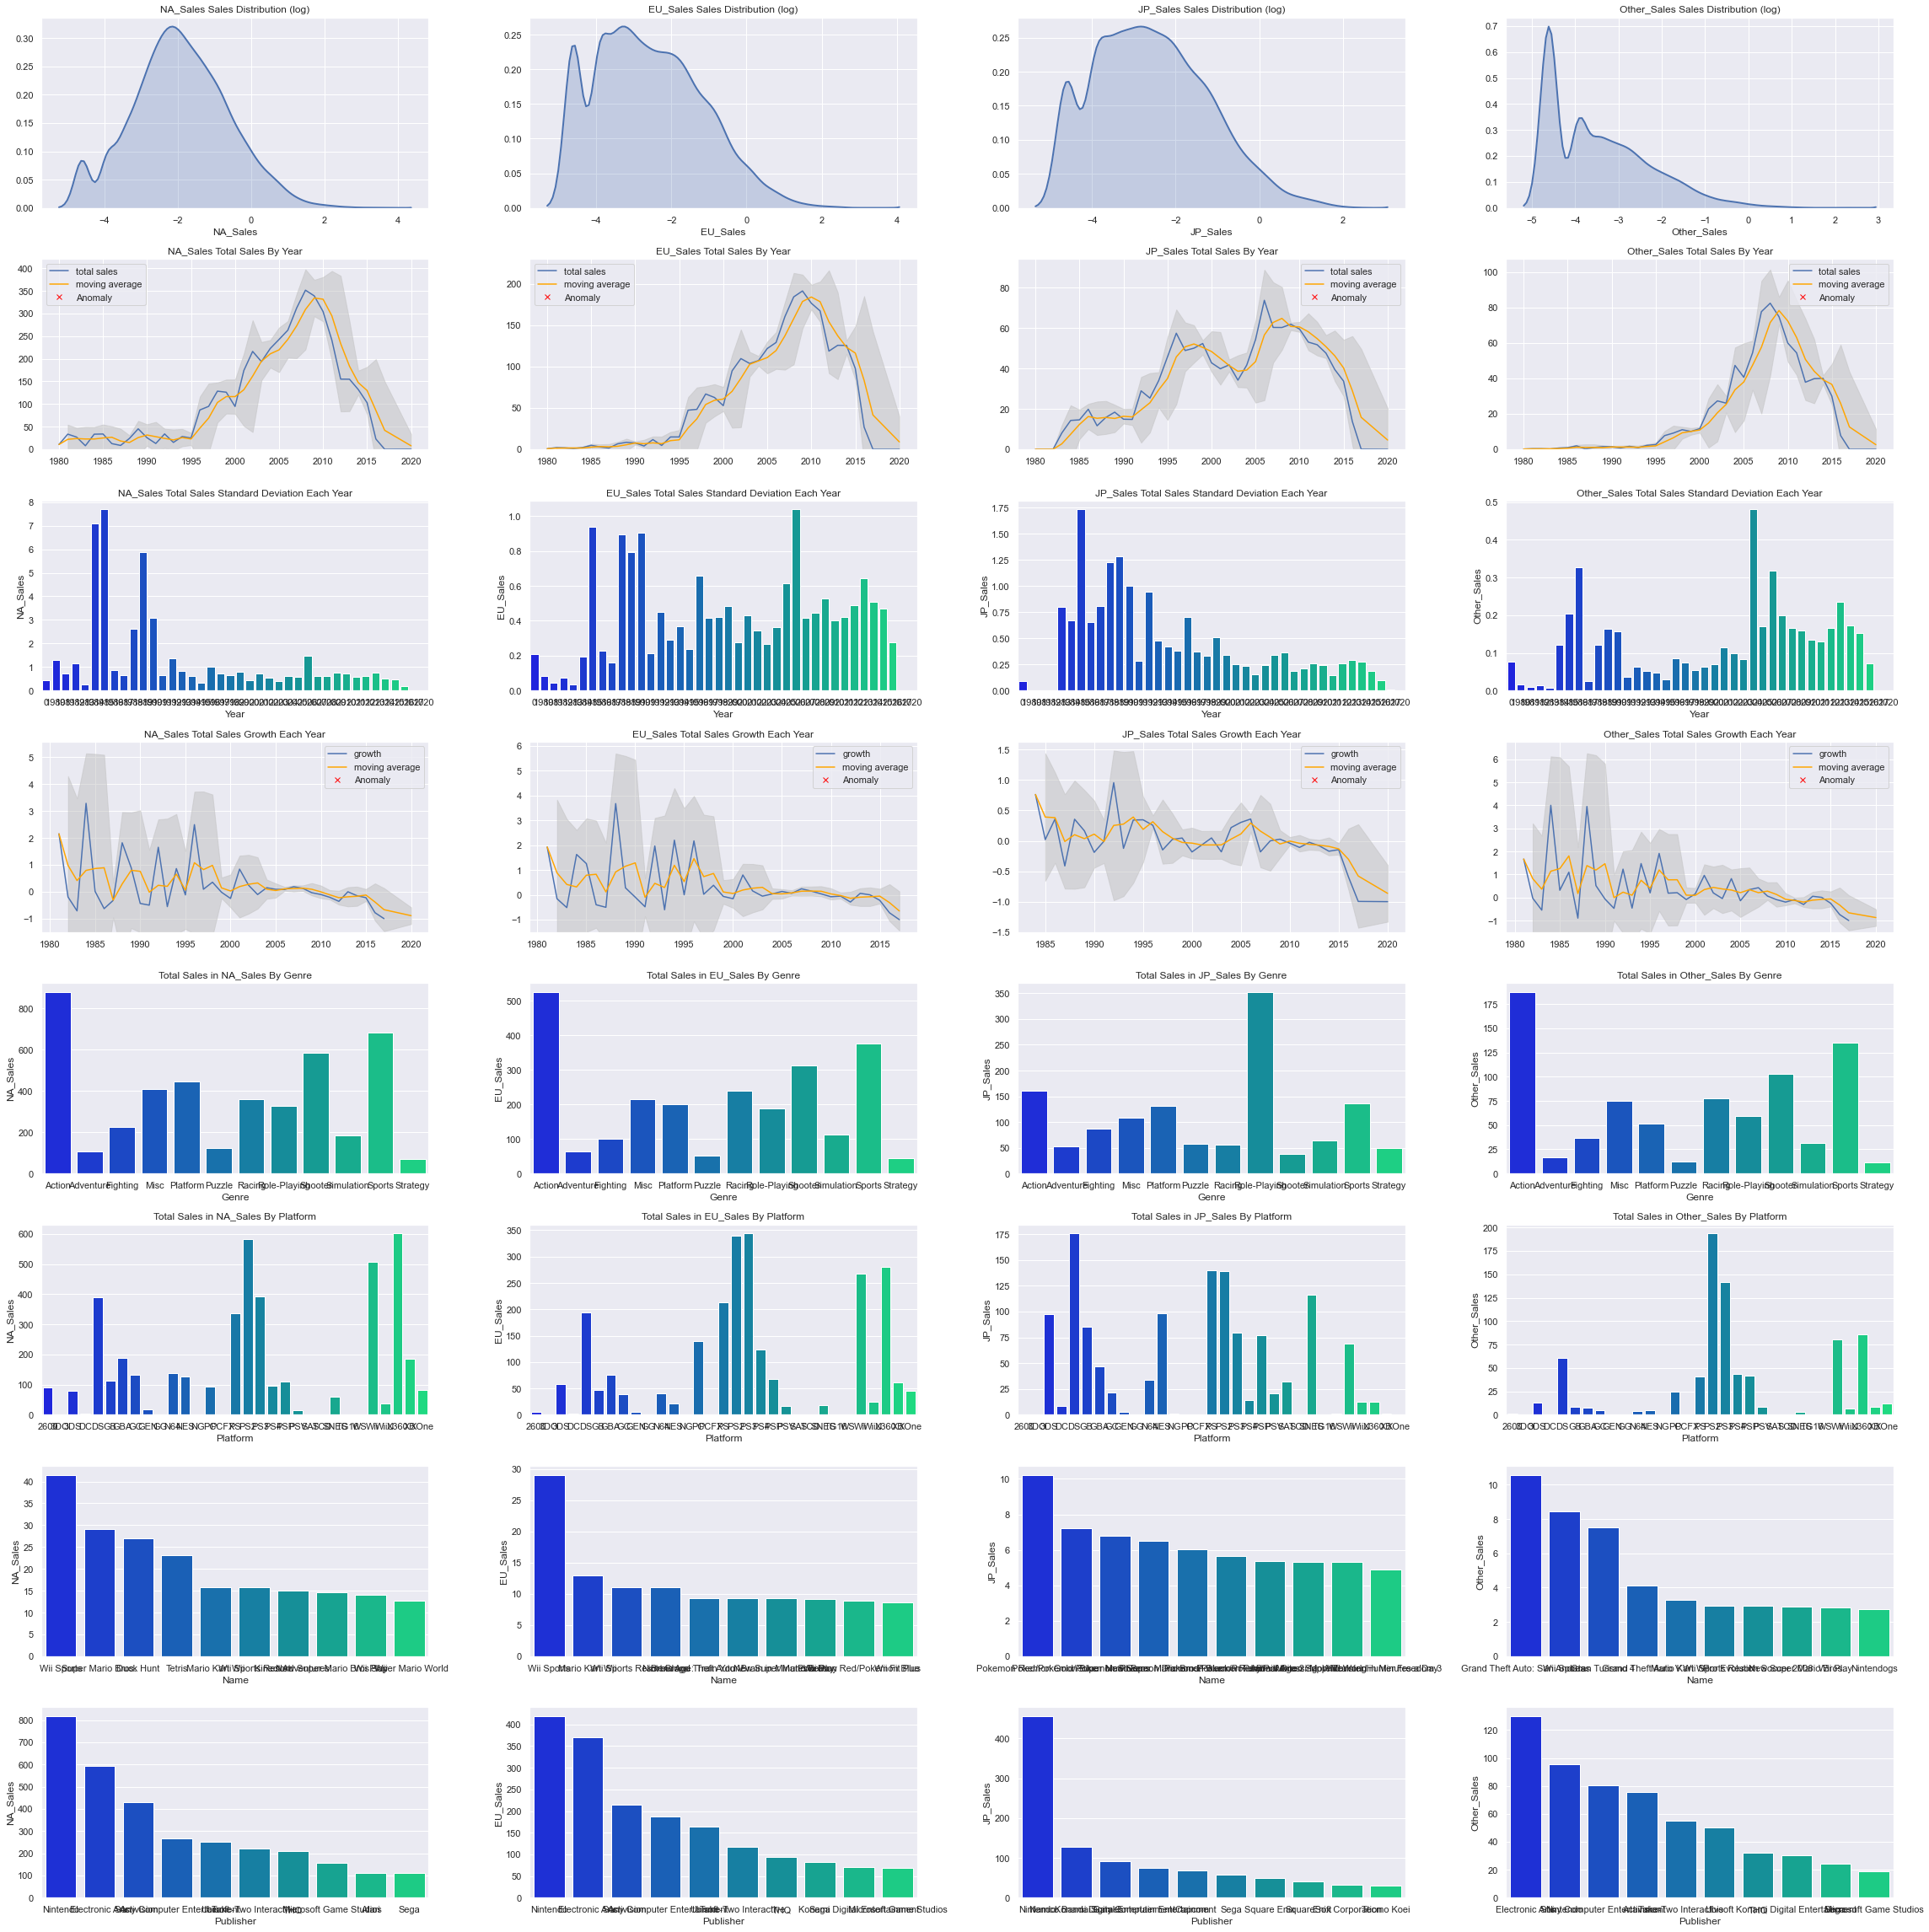

In [45]:
fig, ax = plt.subplots(8, 4, figsize = (32, 32))
columns = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
for i in range(4):
    data_graph = pd.DataFrame(df[df["Year"] != 0].groupby("Year").sum()[columns[i]])
    mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 3)

    sns.distplot(np.log(df[df[columns[i]] != 0][columns[i]]), hist = False, kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[0, i])

    ax[1, i].plot(data_graph.index, data_graph, label = "total sales")
    ax[1, i].plot(mean.index, mean, color = "orange", label = "moving average")
    ax[1, i].fill_between(x = mean.index, y1 = lower_band[columns[i]], y2 = upper_band[columns[i]], color = "silver", alpha = 0.5)
    ax[1, i].plot(data_graph.index[anomaly_index], data_graph.iloc[anomaly_index], "x", color="red", label="Anomaly")

    sns.barplot(x = "Year", y = columns[i], data = df.groupby("Year").std().reset_index(), palette = "winter", ax = ax[2, i])

    data_graph = pd.DataFrame(df[df["Year"] != 0].groupby("Year").sum()[columns[i]].pct_change().dropna())
    mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 3)
    ax[3, i].plot(data_graph.index, data_graph, label = "growth")
    ax[3, i].plot(mean.index, mean, color = "orange", label = "moving average")
    ax[3, i].fill_between(x = mean.index, y1 = lower_band[columns[i]], y2 = upper_band[columns[i]], color = "silver", alpha = 0.5)
    ax[3, i].plot(data_graph.index[anomaly_index], data_graph.iloc[anomaly_index], "x", color="red", label="Anomaly")

    sns.barplot(x = "Genre", y = columns[i], data = df.groupby("Genre").sum().reset_index(), palette = "winter", ax = ax[4, i])
    sns.barplot(x = "Platform", y = columns[i], data = df.groupby("Platform").sum().reset_index(), palette = "winter", ax = ax[5, i])

    data_graph = df.sort_values(columns[i], ascending = False).head(10)
    sns.barplot(x = "Name", y = columns[i], data = data_graph, palette = "winter", ax = ax[6, i])
    sns.barplot(x = "Publisher", y = columns[i], data = df.groupby("Publisher").sum().reset_index().sort_values(columns[i], ascending = False).head(10), palette = "winter", ax = ax[7, i])

    ax[0, i].set_title(columns[i] + " Sales Distribution (log)")
    ax[1, i].set_title(columns[i] + " Total Sales By Year")
    ax[2, i].set_title(columns[i] + " Total Sales Standard Deviation Each Year")
    ax[3, i].set_title(columns[i] + " Total Sales Growth Each Year")
    ax[4, i].set_title("Total Sales in " + columns[i] + " By Genre")
    ax[5, i].set_title("Total Sales in " + columns[i] + " By Platform")
    ax[1, i].legend()
    ax[3, i].legend()
    ax[1, i].set_ylim(0)
    ax[3, i].set_ylim(-1.5)
plt.tight_layout()
plt.show()

**BY PUBLISHER**

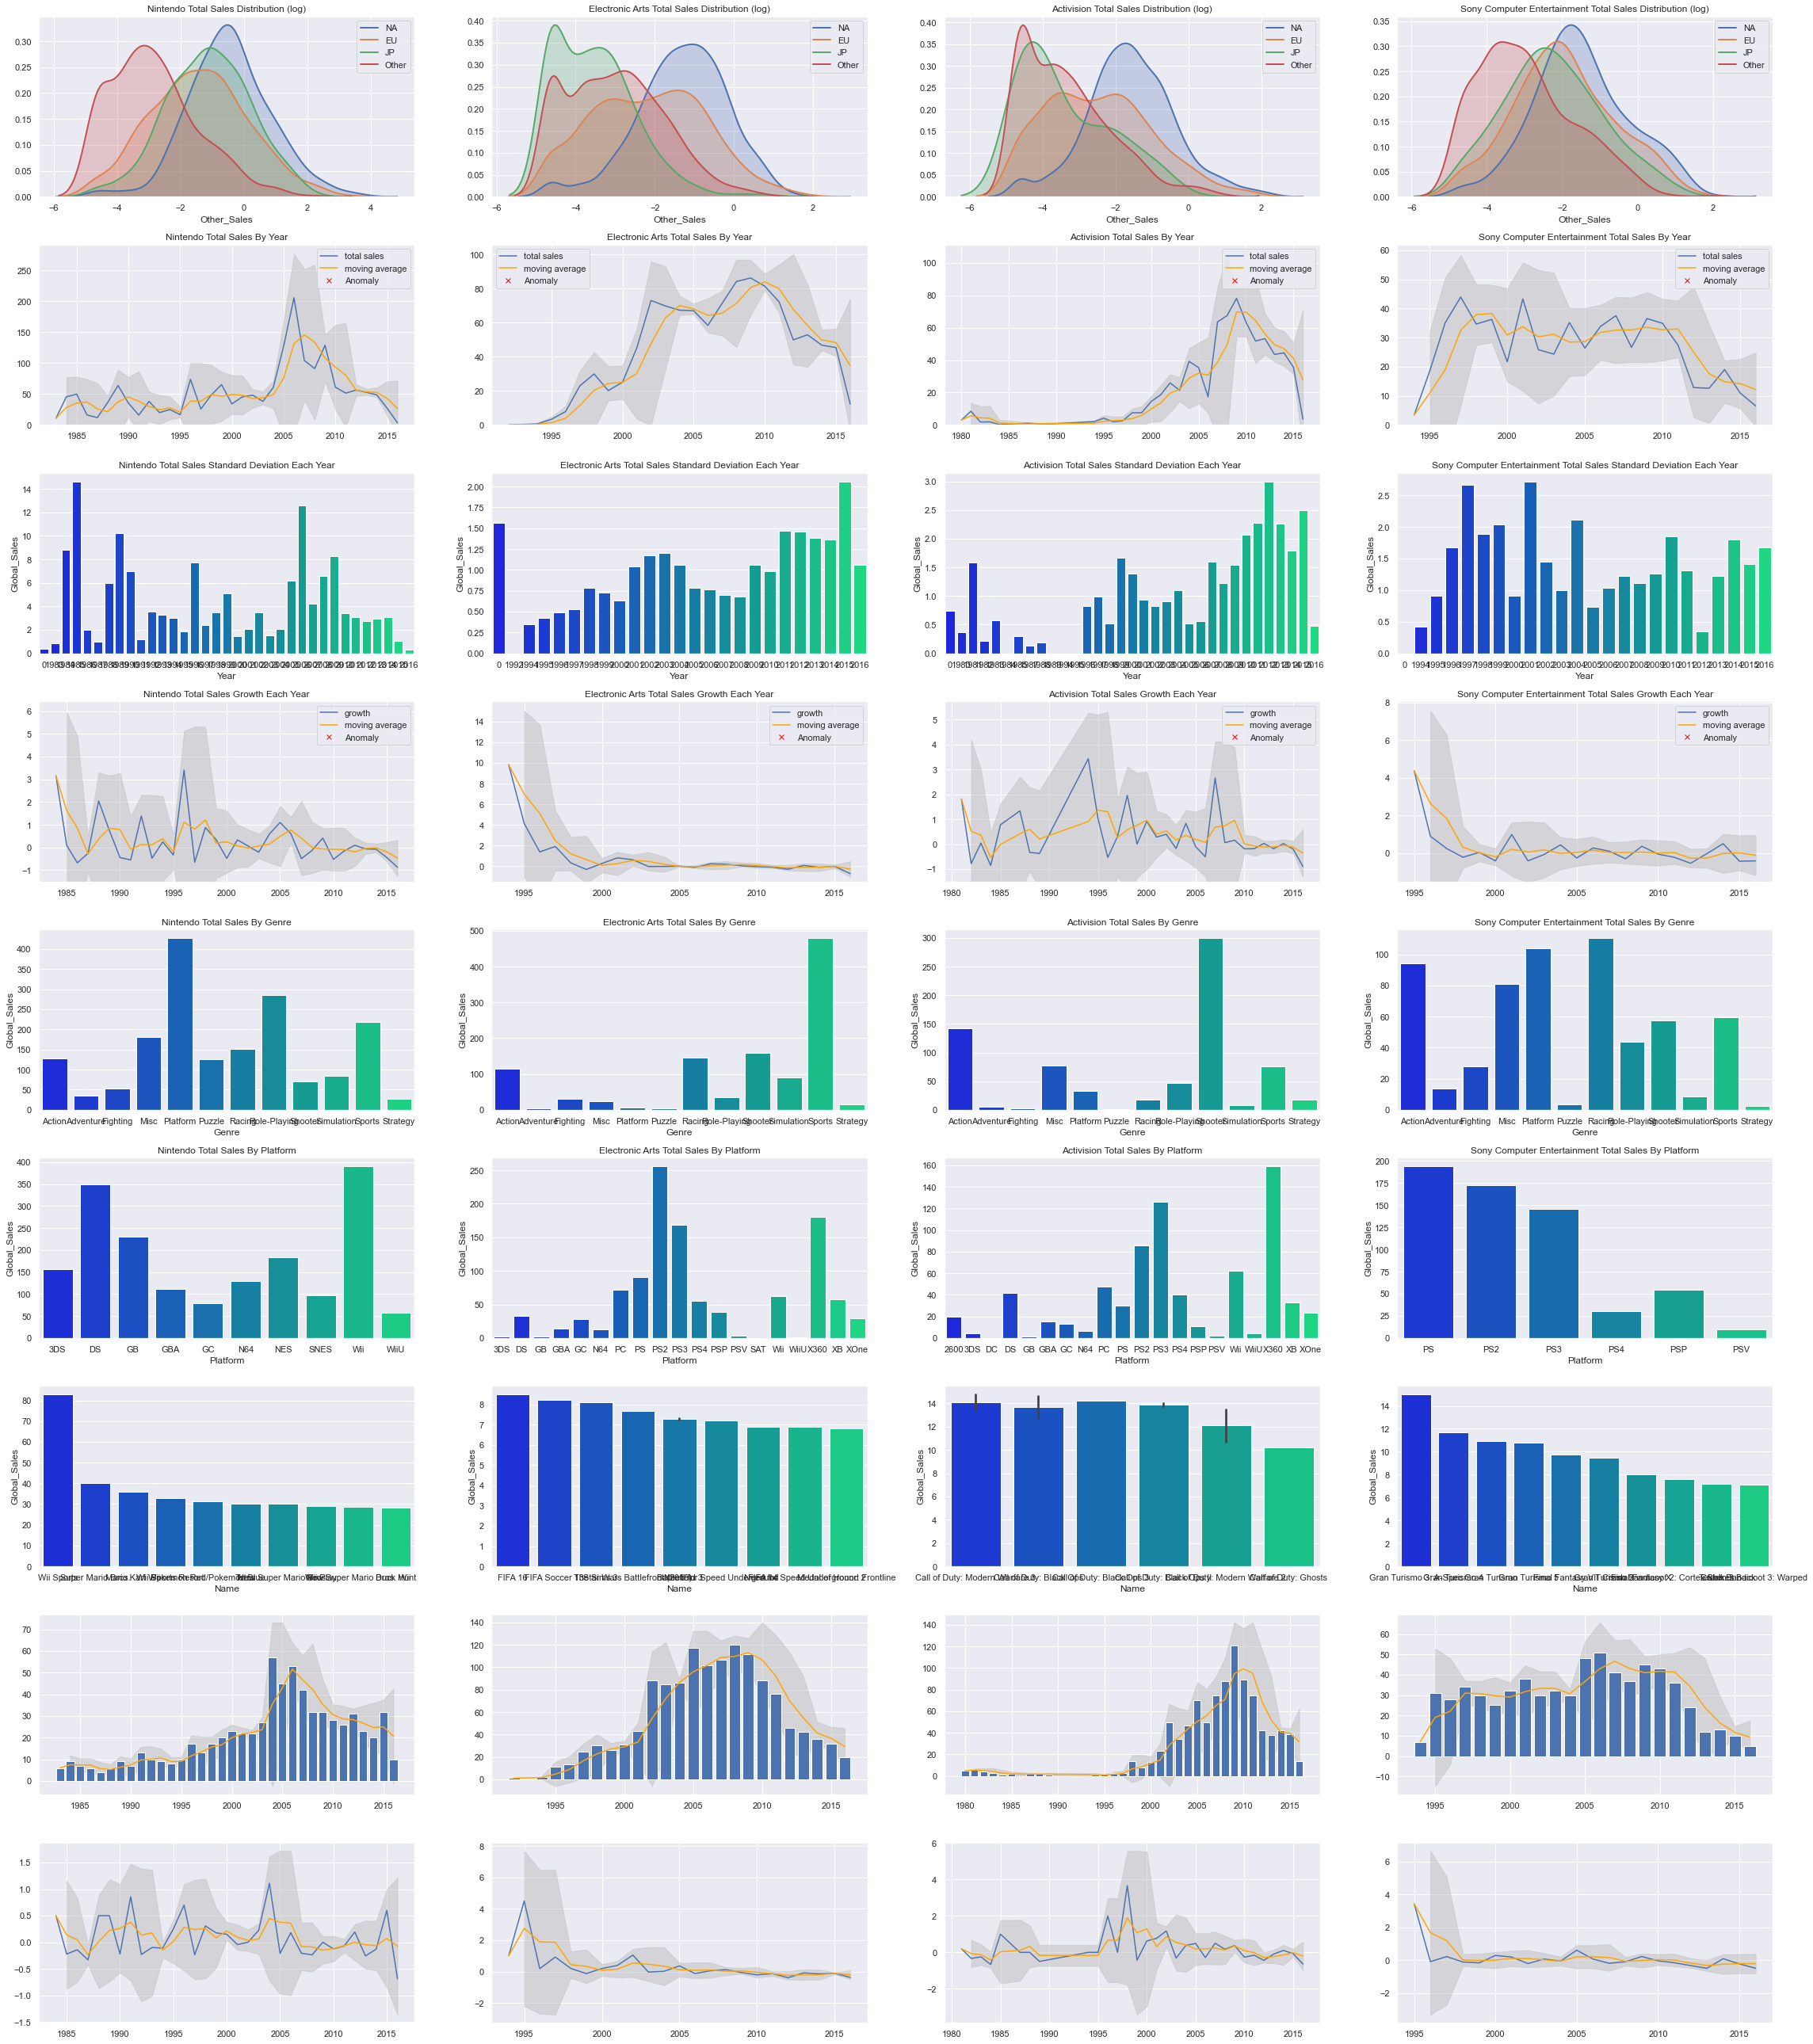

In [46]:
fig, ax = plt.subplots(9, 4, figsize = (32, 36))
columns = ["Nintendo", "Electronic Arts", "Activision", "Sony Computer Entertainment"]
for i in range(4):
    data_graph = pd.DataFrame(df[(df["Year"] != 0) & (df["Publisher"] == columns[i])].groupby("Year").sum()["Global_Sales"])
    mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 3)

    sns.distplot(np.log(df[(df["NA_Sales"] != 0) & (df["Publisher"] == columns[i])]["NA_Sales"]), hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "NA", ax = ax[0, i])
    sns.distplot(np.log(df[(df["EU_Sales"] != 0) & (df["Publisher"] == columns[i])]["EU_Sales"]), hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "EU", ax = ax[0, i])
    sns.distplot(np.log(df[(df["JP_Sales"] != 0) & (df["Publisher"] == columns[i])]["JP_Sales"]), hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "JP", ax = ax[0, i])
    sns.distplot(np.log(df[(df["Other_Sales"] != 0) & (df["Publisher"] == columns[i])]["Other_Sales"]), hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "Other", ax = ax[0, i])

    ax[1, i].plot(data_graph.index, data_graph, label = "total sales")
    ax[1, i].plot(mean.index, mean, color = "orange", label = "moving average")
    ax[1, i].fill_between(x = mean.index, y1 = lower_band["Global_Sales"], y2 = upper_band["Global_Sales"], color = "silver", alpha = 0.5)
    ax[1, i].plot(data_graph.index[anomaly_index], data_graph.iloc[anomaly_index], "x", color="red", label="Anomaly")

    sns.barplot(x = "Year", y = "Global_Sales", data = df[df["Publisher"] == columns[i]].groupby("Year").std().reset_index(), palette = "winter", ax = ax[2, i])

    data_graph = pd.DataFrame(df[(df["Year"] != 0) & (df["Publisher"] == columns[i])].groupby("Year").sum()["Global_Sales"].pct_change().dropna())
    mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 3)
    ax[3, i].plot(data_graph.index, data_graph, label = "growth")
    ax[3, i].plot(mean.index, mean, color = "orange", label = "moving average")
    ax[3, i].fill_between(x = mean.index, y1 = lower_band["Global_Sales"], y2 = upper_band["Global_Sales"], color = "silver", alpha = 0.5)
    ax[3, i].plot(data_graph.index[anomaly_index], data_graph.iloc[anomaly_index], "x", color="red", label="Anomaly")

    sns.barplot(x = "Genre", y = "Global_Sales", data = df[df["Publisher"] == columns[i]].groupby("Genre").sum().reset_index(), palette = "winter", ax = ax[4, i])
    sns.barplot(x = "Platform", y = "Global_Sales", data = df[df["Publisher"] == columns[i]].groupby("Platform").sum().reset_index(), palette = "winter", ax = ax[5, i])

    data_graph = df[df["Publisher"] == columns[i]].sort_values("Global_Sales", ascending = False).head(10)
    sns.barplot(x = "Name", y = "Global_Sales", data = data_graph, palette = "winter", ax = ax[6, i])
    
    data_graph = pd.DataFrame(df[(df["Year"] != 0) & (df["Publisher"] == columns[i])].groupby("Year").nunique()["Rank"])
    mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 3)

    ax[7, i].bar(data_graph.index, data_graph["Rank"])
    ax[7, i].plot(mean.index, mean, color = "orange", label = "moving average")
    ax[7, i].fill_between(x = mean.index, y1 = lower_band["Rank"], y2 = upper_band["Rank"], color = "silver", alpha = 0.5)
    ax[7, i].plot(data_graph.index[anomaly_index], data_graph.iloc[anomaly_index], "x", color="red", label="Anomaly")

    data_graph = pd.DataFrame(df[(df["Year"] != 0) & (df["Publisher"] == columns[i])].groupby("Year").nunique()["Rank"].pct_change().dropna())
    mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 3)
    ax[8, i].plot(data_graph.index, data_graph, label = "growth")
    ax[8, i].plot(mean.index, mean, color = "orange", label = "moving average")
    ax[8, i].fill_between(x = mean.index, y1 = lower_band["Rank"], y2 = upper_band["Rank"], color = "silver", alpha = 0.5)
    ax[8, i].plot(data_graph.index[anomaly_index], data_graph.iloc[anomaly_index], "x", color="red", label="Anomaly")

    ax[0, i].set_title(columns[i] + " Total Sales Distribution (log)")
    ax[1, i].set_title(columns[i] + " Total Sales By Year")
    ax[2, i].set_title(columns[i] + " Total Sales Standard Deviation Each Year")
    ax[3, i].set_title(columns[i] + " Total Sales Growth Each Year")
    ax[4, i].set_title(columns[i] + " Total Sales By Genre")
    ax[5, i].set_title(columns[i] + " Total Sales By Platform")
    ax[0, i].legend()
    ax[1, i].legend()
    ax[3, i].legend()
    ax[1, i].set_ylim(0)
    ax[3, i].set_ylim(-1.5)
plt.tight_layout()
plt.show()

**GENRE AND PLATFORM**

- From the heatmap, we can see that many Action game was published to X360, Playstation 3 and Playstation 2. If we want to create action games, we need to consider Playstation by Sony and Xbox by Microsoft as our game platform because many people tend to play this game through this platform rather than PC or Nintendo. But if we want to create sports game, then Playstation and Nintendo is the best platform to sell our product.
- If we want to invest in Sports games, then EA is the best publisher. Their sales in sports games is really high compare to other publisher.

In [47]:
data_graph = df.groupby(["Platform", "Genre"]).sum().reset_index()
data_graph = data_graph.pivot_table(index = "Platform", columns = "Genre", values = "Global_Sales").fillna(0)#.reset_index()

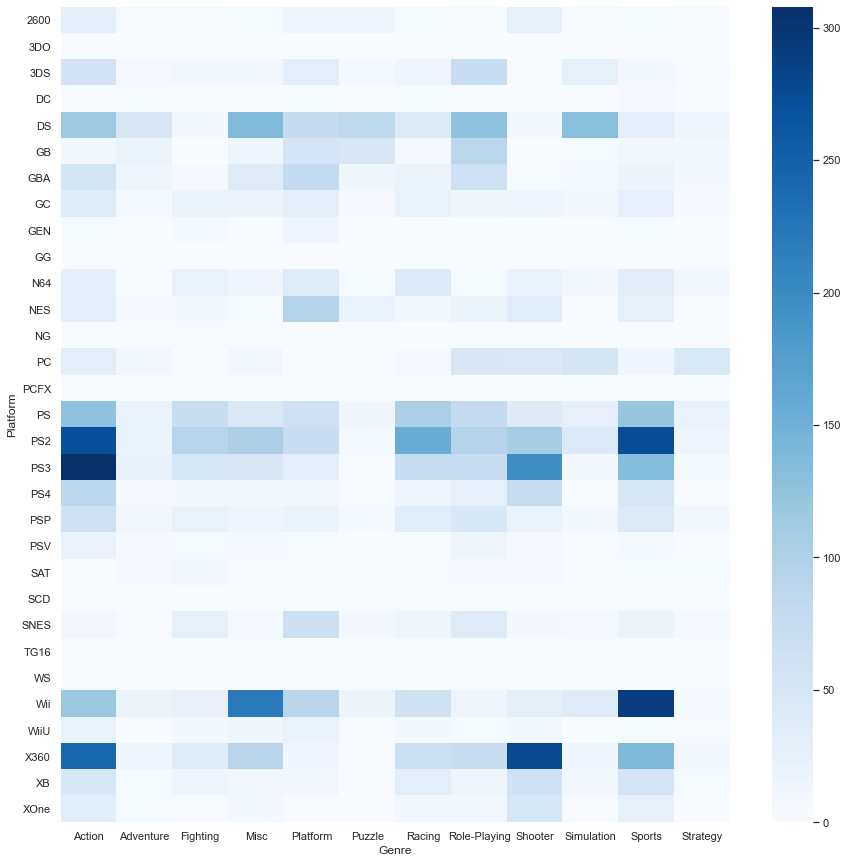

In [48]:
plt.figure(figsize = (15, 15))
sns.heatmap(data_graph, cmap = "Blues")
plt.show()

In [49]:
columns = ['Nintendo', 'Electronic Arts', 'Activision',
           'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive',
           'THQ', 'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games']
data_graph = df.groupby(["Publisher", "Genre"]).sum().reset_index()
data_graph = data_graph[data_graph["Publisher"].isin(columns)].pivot_table(index = "Publisher", columns = "Genre", values = "Global_Sales").fillna(0)#.reset_index()

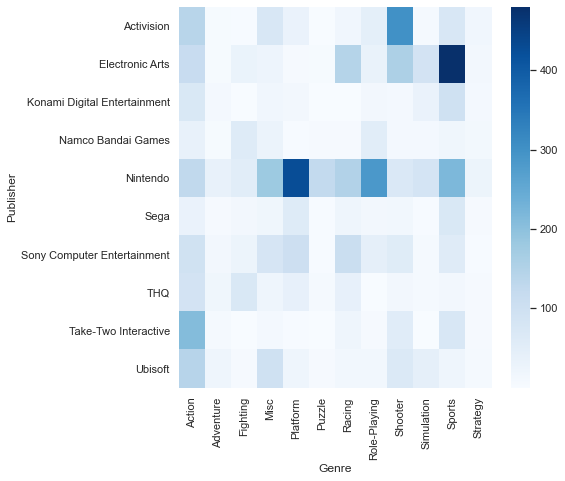

In [50]:
plt.figure(figsize = (7, 7))
sns.heatmap(data_graph, cmap = "Blues")
plt.show()